<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('seaborn-muted')

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [215]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [216]:
movies.count(axis = 0)
# Number of rows

star_rating       979
title             979
content_rating    976
genre             979
duration          979
actors_list       979
dtype: int64

In [217]:
movies.count(axis = 1)
# Number of columns

0      6
1      6
2      6
3      6
4      6
      ..
974    6
975    6
976    6
977    6
978    6
Length: 979, dtype: int64

In [218]:
movies.info()
# This method shows these two pieces of information together :)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [219]:
movies.dtypes
# Checking the data type of each column

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [220]:
movies['duration'].mean()
# Average duration of all movies

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [221]:
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

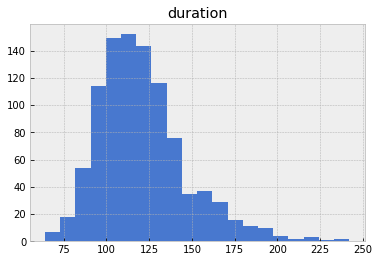

In [222]:
movies.hist('duration', bins = 20);
# I chose 20 because I wanted the data to look like as normal of a distribution as possible

In [223]:
pd.qcut(movies['duration'], q=4)
# Also did some experimentation with qcut to understand how to split the data equally into four groups
# Didn't get very far, but think this would be interesting to explore further

0      (134.0, 242.0]
1      (134.0, 242.0]
2      (134.0, 242.0]
3      (134.0, 242.0]
4      (134.0, 242.0]
            ...      
974    (102.0, 117.0]
975    (117.0, 134.0]
976    (134.0, 242.0]
977    (102.0, 117.0]
978    (117.0, 134.0]
Name: duration, Length: 979, dtype: category
Categories (4, interval[float64]): [(63.999, 102.0] < (102.0, 117.0] < (117.0, 134.0] < (134.0, 242.0]]

#### Use a box plot to display that same data.

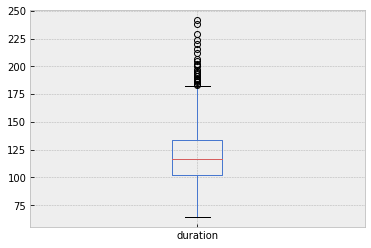

In [224]:
movies.boxplot('duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [225]:
movies.groupby('content_rating')['title'].count().sort_values(ascending=False)

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

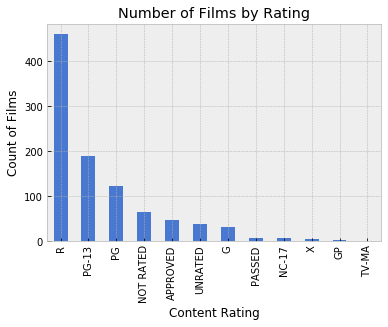

In [226]:
vis = movies.groupby('content_rating')['title'].count().sort_values(ascending=False)
vis.plot.bar();
plt.ylabel('Count of Films');
plt.xlabel('Content Rating');
plt.title('Number of Films by Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [227]:
movies = movies.replace(['NOT RATED', 'APPROVED','PASSED', 'GP'], 'UNRATED')
movies.groupby('content_rating')['title'].count()
# Re-ran the groupby to double check that it worked 

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: title, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [228]:
movies = movies.replace(['X', 'TV-MA'], 'NC-17')
movies.groupby('content_rating')['title'].count()

content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
Name: title, dtype: int64

#### Count the number of missing values in each column.

In [229]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [230]:
movies[movies.isna().any(axis=1)]
# Butch Cassidy is rated PG
# Where Eagles Dare is also PG
# True Grit is rated PG-13
# I'm going to try different operations to do these

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [231]:
movies.at[936,'content_rating'] = 'PG-13'

In [232]:
movies.iloc[936]
# It worked :)

star_rating                                                   7.4
title                                                   True Grit
content_rating                                              PG-13
genre                                                   Adventure
duration                                                      128
actors_list       [u'John Wayne', u'Kim Darby', u'Glen Campbell']
Name: 936, dtype: object

In [233]:
movies = movies.fillna('PG')
movies.isnull().sum()
# Replacing the other null values with PG

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [234]:
movies.iloc[[187, 649, 936]]
# Here I'm just checking data at the specific indices :)
# It worked

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [235]:
two_or_more = movies[movies.duration >= 120]['star_rating'].mean()
# Average star rating for movies two hours or longer
two_or_more

7.948898678414082

In [236]:
less_than_two = movies[movies.duration < 120]['star_rating'].mean()
# Average star rating for movies under two hours
less_than_two

7.838666666666657

In [237]:
two_or_more > less_than_two
# The average star rating for movies two hours or longer is greater than movies under two hours

True

#### Use a visualization to detect whether there is a relationship between duration and star rating.

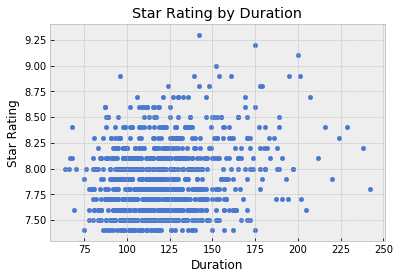

In [238]:
movies.plot.scatter(x='duration',y='star_rating');
plt.xlabel('Duration');
plt.ylabel('Star Rating');
plt.title('Star Rating by Duration');
# Just looks like noise to me

#### Calculate the average duration for each genre.

In [239]:
movies.groupby('genre')['duration'].mean().sort_values(ascending=False)

genre
Western      136.666667
Adventure    134.840000
Biography    131.844156
Drama        126.539568
Action       126.485294
Crime        122.298387
Mystery      115.625000
Thriller     114.200000
Fantasy      112.000000
Sci-Fi       109.000000
Comedy       107.602564
Family       107.500000
Horror       102.517241
Film-Noir     97.333333
Animation     96.596774
History       66.000000
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

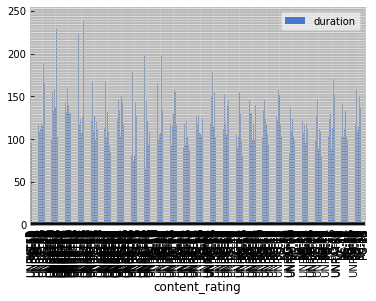

In [240]:
movies.plot.bar(x='content_rating',y='duration');
# This is really difficult to interpret so I'm going to try another way

In [241]:
# Another possibility is to get the mean of the duration and plot that as a bar chart by content rating
# Struggled with this and couldn't figure out the correct syntax to do this

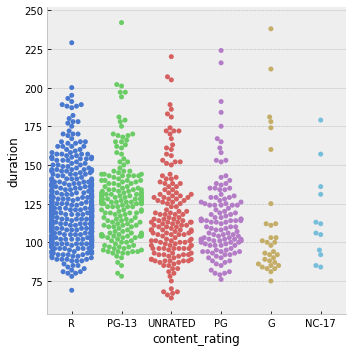

In [242]:
import seaborn as sns
sns.catplot(x='content_rating',y='duration', kind='swarm', data=movies);

#### Determine the top rated movie (by star rating) for each genre.

In [255]:
movies.groupby(['genre'], sort=False)['title','star_rating'].max()

,title,star_rating
genre,,
Crime,Zodiac,9.3
Action,Yojimbo,9.0
Drama,Zulu,8.9
Western,Unforgiven,8.9
Adventure,True Grit,8.9
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Animation,Wreck-It Ralph,8.6
Mystery,Vertigo,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [259]:
movies[movies.duplicated(['title'])]
# These are the movies that have duplicate titles within the movies dataframe

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [260]:
movies.loc[movies['title'].isin(['The Girl with the Dragon Tattoo', 'Dracula', 'Les Miserables', 'True Grit'])]
# There's likely a more elegant way of getting from the previous query to here, but this allows me to see all of the
# movies with those corresponding titles

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [261]:
movies[movies.duplicated(['title', 'actors_list'])]
# By evaluating the movies off of both title and actors list criteria, we can see that these movies are
# not duplicates. They are remakes of the same movie by different actors.

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [262]:
movies.groupby('genre')['title'].count() >= 10
# Using this to manually figure out a list of relevant genres

genre
Action        True
Adventure     True
Animation     True
Biography     True
Comedy        True
Crime         True
Drama         True
Family       False
Fantasy      False
Film-Noir    False
History      False
Horror        True
Mystery       True
Sci-Fi       False
Thriller     False
Western      False
Name: title, dtype: bool

In [263]:
movies.groupby('genre')['title'].count() >= 10
morethanten = movies[movies['genre'].isin(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Horror', 'Mystery'])]
morethanten.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [265]:
movies['genre'].value_counts()
# Only partway through this

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [266]:
movies.groupby('genre')['star_rating'].mean()
# Only partway through this

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

## Bonus

#### Figure out something "interesting" using the actors data!

In [276]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [269]:
movies['actors_list'].value_counts()
# The Harry Potter movies have the most films represented with a repeating cast

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']                6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                  3
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                          2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']             2
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']            2
                                                                     ..
[u'Evan Rachel Wood', u'Jim Sturgess', u'Joe Anderson']               1
[u'Vladimir Garin', u'Ivan Dobronravov', u'Konstantin Lavronenko']    1
[u'Bruce Willis', u'Alan Rickman', u'Bonnie Bedelia']                 1
[u'Andy Lau', u'Tony Chiu Wai Leung', u'Anthony Chau-Sang Wong']      1
[u'Charlton Heston', u'Roddy McDowall', u'Kim Hunter']                1
Name: actors_list, Length: 969, dtype: int64

In [ ]:
https://datascience.stackexchange.com/questions/37914/coding-problem-extracting-values-from-a-column-and-forming-a-new-dataframe-ed

In [283]:
movies.explode('actors_list')
# First attempt at trying to get the data from the actors_list

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [286]:
movies.actors_list.apply(pd.Series)

,0
0,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...
974,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."
